<a href="https://colab.research.google.com/github/tirmukherjee/tirmukherjee/blob/main/Well_Testing(Flowing%20Bottom-hole%20pressure%20profile%20as%20a%20function%20of%20position%20and%20time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Well Testing: Bottom Hole Flowing Pressure profile as a function of time and postition 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Table.csv to Table.csv


In [5]:
df3 = pd.read_csv('Table.csv')

In [6]:
df3.head(5)

,x,Ei(-x)
0,0.1,1.82292
1,0.2,1.22265
2,0.3,0.90568
3,0.4,0.70238
4,0.5,0.55977


In [7]:
df3 = df3.rename(columns=({'Ei(-x)':'-Ei(-x)'}))

In [8]:
df3.head(5)

,x,-Ei(-x)
0,0.1,1.82292
1,0.2,1.22265
2,0.3,0.90568
3,0.4,0.70238
4,0.5,0.55977


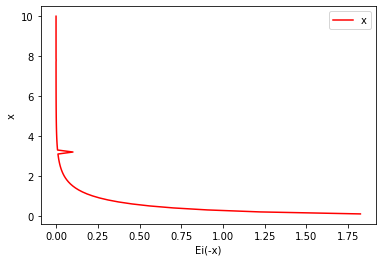

In [9]:
df3.plot(kind='line',x='-Ei(-x)',y='x',color='red')
plt.xlabel('Ei(-x)')
plt.ylabel('x')
plt.show()

In [10]:
x1=df3['x'].values
Ei=df3['-Ei(-x)'].values

In [14]:
n=int(input("Enter the number of radius values which you are willing to input: "))
r=[]
for i in range(1,n+1):
  j=float(input(f"Enter {i} radius: "))
  r.append(j)
print(r)

Enter the number of radius values which you are willing to input: 10
Enter 1 radius: 0.25
Enter 2 radius: 5
Enter 3 radius: 10
Enter 4 radius: 50
Enter 5 radius: 100
Enter 6 radius: 500
Enter 7 radius: 1000
Enter 8 radius: 1500
Enter 9 radius: 2000
Enter 10 radius: 2500
[0.25, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0, 1500.0, 2000.0, 2500.0]


Calculating the upper an lower limits of the Ei function approximation

In [15]:
#Reservoir Properties:

Bo=1.25 #Oil Formation Volume Factor (bbl/stb)
mu=1.5 #oil viscosity(cp)
ko=60.0 #effective permeability to oil in millidacy(md)
phi=0.15 #porosity in decimal 
h=15.0 #pay zone thikness in feet(ft)
Pi=4000.0 #Initial Reservoir Pressure(psi)
ct=12E-6 #total compressibility in (psi)^-1
rw=0.25 #wellbore radius in feet(ft)
Qo=300 #oil flow rate in STB/day


time=int(input("Enter the elapsed time(in hours): "))
lower_limit=(3.79E+1)*phi*mu*ct*(rw**2)/ko
upper_limit=(948*phi*mu*ct*(r[len(r)-1]**2))/ko
if (time > lower_limit) and (time < upper_limit):
  print(f"The Ei function approximation is valid and the well with a radius of {rw} ft, is centered in a cylindrical reservoir of radius {r[len(r)-1]} feet")
  print(f"The reservoir is acting as if it were infinite in size and no flow occurs across the outer boundary,i.e., at {r[len(r)-1]} feet")
  print(f"The well is producing at a constant rate and the pressure is maintained at the initial reservoir pressure of {Pi} psi just when the production begins")

Enter the elapsed time(in hours): 1
The Ei function approximation is valid and the well with a radius of 0.25 ft, is centered in a cylindrical reservoir of radius 2500.0 feet
The reservoir is acting as if it were infinite in size and no flow occurs across the outer boundary,i.e., at 2500.0 feet
The well is producing at a constant rate and the pressure is maintained at the initial reservoir pressure of 4000.0 psi just when the production begins



The calculation of Ei function arguement

In [18]:
x_trunc=[]
for i in range(0,len(r)):
  x=948*phi*mu*ct*(r[i]**2)/(ko*time)
  print(f"For radius={r[i]} ft, x or the Ei function arguement={x}")
  if x>0.01:
    x_trunc.append(np.round(x,1))
  elif x<0.01:
    x_trunc.append(x)
print(x_trunc)

For radius=0.25 ft, x or the Ei function arguement=2.66625e-06
For radius=5.0 ft, x or the Ei function arguement=0.0010665000000000002
For radius=10.0 ft, x or the Ei function arguement=0.004266000000000001
For radius=50.0 ft, x or the Ei function arguement=0.10665
For radius=100.0 ft, x or the Ei function arguement=0.4266
For radius=500.0 ft, x or the Ei function arguement=10.665
For radius=1000.0 ft, x or the Ei function arguement=42.66
For radius=1500.0 ft, x or the Ei function arguement=95.985
For radius=2000.0 ft, x or the Ei function arguement=170.64
For radius=2500.0 ft, x or the Ei function arguement=266.625
[2.66625e-06, 0.0010665000000000002, 0.004266000000000001, 0.1, 0.4, 10.7, 42.7, 96.0, 170.6, 266.6]


In [20]:
constant=70.6*Qo*Bo*mu/(ko*h)
print(constant)

44.125


The Flowing Bottomhole Pressure (Pwf) can be measured at various distances from the wellbore at a certain time

In [21]:
Pwf=[]
for i in range(0,len(r)):
  if (x_trunc[i]) < 0.01:
    Pwf.append(Pi+(constant*np.log(1.781*x_trunc[i])))
  elif x_trunc[i] > 0.01 and x_trunc[i] < 10.0:
    for j in x1:
      if j==x_trunc[i]:
        inp = x1.tolist().index(j)
        Pwf.append(Pi+(constant*(-Ei[inp])))
  elif x_trunc[i] > 10.0:
    Pwf.append(Pi)
print(Pwf)

[3459.130639414097, 3723.504012555237, 3784.6742512396518, 3919.563655, 3969.0074825, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0]


Text(0, 0, 'For time=1 hour(s)')

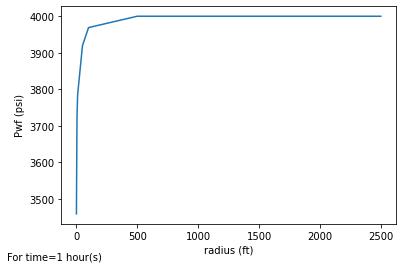

In [22]:
plt.xlabel('radius (ft)')
plt.ylabel('Pwf (psi)')
plt.plot(r,Pwf)
plt.figtext(0,0,f"For time={time} hour(s)")